You can go for uci machine learning repository to load the data the link is given here --> https://archive.ics.uci.edu/ml/datasets/heart+disease    

## Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings('ignore')

## Importing the dataset

In [3]:
df=pd.read_csv('processed.cleveland.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.shape

(303, 14)

# Attribute Information:

## Only 14 attributes used:
1. Age
2. Sex
3. CP, Chest pain
4. restbp, resting blood pressure(in mm Hg)
5. chol, serum cholesterol in mg/dl
6. fbs, fasting blood sugar
7. restecg, resting electrocardiographic results
8. thalach, maximum heart rate achieved
9. exang, exercise induced angina
10. oldpeak, ST depression induced by exercise relative to rest 
11. slope, the slope of the peak exercise ST segment 
12. ca, number of major vessels (0-3) colored by fluoroscopy 
13. thal, this is short of thalium heart scan.
14. hd, diagnosis of heart disease, the predicted attribute

In [6]:
# checking the columns names before changing 
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [7]:
# changing the column names

df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
# now will check for missing data 
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [9]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [11]:
# the ca and thal columns has dtypes as object so their is some problem in the data lets check itout
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [12]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [13]:
# In both the ca and thal has missing values that they are representing has "?" that means their is no data avaliable 

# so will find the howmany records has missing values

len(df[df.ca=='?'])     # in ca we have 4 missing data

4

In [15]:
len(df[df.thal=='?'])     # in ca we have 2 missing data

2

In [17]:
# will check for both together
df[(df.ca=='?')|(df.thal=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


we have totaly 6records with missing data so we can replace those missing data with mode or we can update by using group by or we can simply drop those records 

In this script i am going to simply drop those 6 records 

In [19]:
# Here i am going to drop those records and asigning the data for new variable called new_df

new_df=df.drop(df[(df.ca=='?')|(df.thal=='?')].index,axis=0)

In [20]:
new_df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [21]:
new_df.shape     # before there were totally 303 records but after droping those 6 records we are having 297 records 

(297, 14)

In [25]:
# now will recheck the [ca and thal] have any missing values are not
print(new_df.ca.unique())
print(new_df.thal.unique())

['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


You can see over here their is no missing records like before 

In [26]:
# Now will split the dataset to the dependent and independent variable 

X=new_df.drop('hd',axis=1)
y=new_df['hd']

## Formating the Data 

Now we had split the data to X and y all the independent variable are in the x variable which are used to predict the y 
so we must be very focused on the independent variable the below list tells us about each feature and its type that feature should contain (float or categorical)

- age:- Float
- sex:- category
    - 0 = female
    - 1 = male
- cp:- chest pain, category
    - 1 = typical angina
    - 2 = atypical angina
    - 3 = non-anginal pain
    - 4 = asymptomatic
- restbp, resting blood pressure(in mm hg), Float
- chol, serum cholesterol in mg/dl, Float
- fbs, fasting blood sugar, Category
    - 0 =  >=120 mpg/dl
    - 1 =  <=120 mpg/dl
- restecg, resting electrocardiographic results, Category
    - 1 = normal
    - 2 = having ST-T wave abnormality
    - 3 = showing probable or definite left ventricular hypertropy
- thalach, maximum heart rate achieved, Float
- exang, exercise induced angina, Category
    - 0 = no
    - 1 = yes
- oldpeak, ST depression induced by exercise relative to rest. Float
- slope, the slope of the peak exercise ST segment, Category
    - 1 = unsloping
    - 2 = flat
    - 3 = downsloping
- ca, number of major vessels (0-3) colored by fluoroscopy, Float
-  thal, thalium heart scan, Category
    - 3 = normal (no cold spots)
    - 6 = fixed defect(cold spots during rest and exercise)
    - 7 = reversible defect(when cold spots only appear during exercise)
   
Now, just to review, let's look at the data types in X to remember how python is seeing the data right now

In [28]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [30]:
new_df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [31]:
# will check the unique values only for categorical data

cat_data=df[['sex','cp','fbs','restecg','exang','slope','thal']]

for i in cat_data:
    print(i)
    print(new_df[i].unique())

sex
[1. 0.]
cp
[1. 4. 3. 2.]
fbs
[1. 0.]
restecg
[2. 0. 1.]
exang
[0. 1.]
slope
[3. 2. 1.]
thal
['6.0' '3.0' '7.0']


In [33]:
# will take only those data which has more than 2 levels and perform one hot encoding because the decision tree will classify based on 2 condition either yes or no 

X_encoded=pd.get_dummies(X,columns=['cp','restecg','slope','thal'],drop_first=True)
X_encoded

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,1,0,1,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,0,1,0,0,1,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,0,0,0,0,0,1,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,0,1,0,0,1,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,0,1,0,0,1,0,0,1


### We are going to build simple classification problem here

Now one last thing before we build a classification Tree.  y dosen't just contain 0s and 1s insted, it has 5 different levels of heart disease 0=no heart disease and 1-4 are various degress of heart diseases. we can see thies with unique()

In [36]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

if someone has heart disease we keep it has 1 and if someone don't have heart disease we keep it as 0

In [41]:
y_not_zero_index= y > 0   # get the index of each non zero values in y
y[y_not_zero_index]=1     # set each non-zero values in y to 1
y.unique()

array([0, 1], dtype=int64)

## Now will build the model
## Firstly will Build a Preliminary Classification Tree

In [43]:
# will simply spilt the data into training and testing test set and build the model

X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.25,random_state=42)

model1=DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

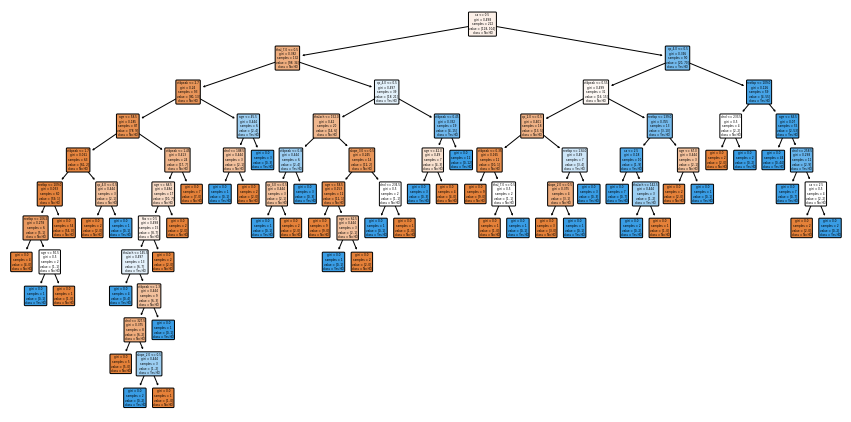

In [46]:
# Note will plot the tree ane see its depth
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(model1,filled=True,rounded=True,class_names=['No HD','Yes HD'],feature_names=X_encoded.columns)
plt.show()

You can see over here the tree is very big because it has built to its complete depth now will prunning the tree if you won't prun the tree it leads to overfitting because its simply learning unwanted things to its complete depth

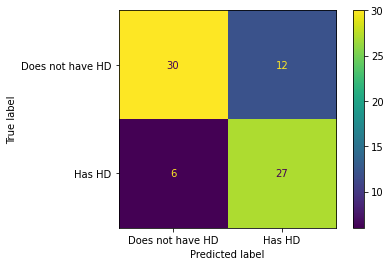

In [47]:
# will perform the confusion matrix and check for training and testing data how the model is performing

plot_confusion_matrix(model1,X_test,y_test,display_labels=['Does not have HD','Has HD'])

In the confusion matrix, we see that the 30+11 =41 people that does not have Heart Disease, 30(73.17%) were correctly classified. And that the 6+27 =33 people that have Heart Disease, where 27(81.81%) were classified correctly. Can we do better? One thing that might be holding this classification Tree back is that it may have overfit the training dataset. so let's prune the tree. Pruning :- In theory it will cut down the tree, If we use pruning it should solve the overfitting problem and give us better results

## Cost Complexity Pruning Part 1: Visualize alpha
    

**Decision Tree** are notorious for being **overfit** to the **Training Dataset,** and there are a lot of parameters, like **max_depth** and **min_samples**, that are improves the accuracy with the **Testing Dataset**.

Pruning a decision Tree is all about finding the right value for the pruning parameter, **alpha**, which controls how little or how much pruning happens.
One way to find the optimal value for **alpha** is to plot the accuracy of the tree as a function of different values. we'll do this for both the **Training Dataset** and the **Testing Dataset**

First, let's extract the different values of **alpha** that are avaliable for this tree and build a pruned tree for each value for **alpha**. **Note :** we omit this maximum value for alpha with **ccp_alphas=ccp_alphas[ : -1]** because it would prune all leaves, leaving us with only a root insted of a tree.

In [52]:
path=model1.cost_complexity_pruning_path(X_train,y_train)    # determine values for alpha
ccp_alphas= path.ccp_alphas   # extract different values for alpha
ccp_alphas = ccp_alphas[:-1]  # extract the maximum value for alpha

models =[]  # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    model2=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    model2.fit(X_train,y_train)
    models.append(model2)

Now let's graph the accuracy of the trees using the **Training Dataset** and the **Testing Dataset** as a function of alpha.

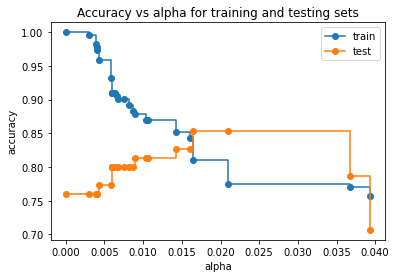

In [54]:
train_scores=[model.score(X_train,y_train) for model in models]
test_scores=[model.score(X_test,y_test) for model in models]

fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the **Testing Dataset** hits its maximum value when **alpha** is about **0.016**. After this value for alpha, the accuracy of the **Training Dataset** drops off and that suggests we should set ccp_alpha=0.016

**Note:** When we apply **Cost Complexity Pruning** to a **Classification Tree**, values for alpha go from 0 to 1, because GINI Scores go from 0 to 1. in contract, values for alpha for a **Regression Tree** can be much larger since the squared residuals can, in theory, go from 0 to positive infinity.

Since there are many ways we could have divided the original dataset into **Training** and **Testing** datasets, how do we used the best **Training Dataset** and how do we know we used the best **Testing Dataset?** Typically, we answer this questions with **10-Fold Cross Validation.** So that's what we're going to do now, and we'll do it with the **Cross_validation  using cross_val_score()** function.

## Cost Complexity Pruning Part 2: Cross Validation for Finding the Best Alpha

The graph we just drew suggested one values for alpha, **0.016**, but another set of data might suggest another optimal value.

first, let's demonstrate that different training and testing datasets result in trees with different accuracies when we set **ccp_alpha=0.016**. we will do this by using the cross_val_score() function to generate different training and testing datasets and then train and test the tree with those datasets.

<AxesSubplot:xlabel='tree'>

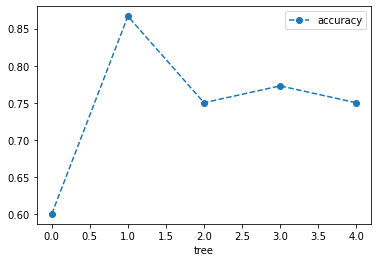

In [55]:
model3=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016) # create the tree with ccp_alpha=0.016

# now use 5-fold cross validation create 5 different training and testing datasets that are then used to train and test tree.
## Note:- We use 5-fold because we don't have tons of data..
scores=cross_val_score(model3,X_train,y_train,cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

The graph above shows that using different **Training** and **Testing** data with the same alpha resulted in different accuracies, suggesting that alpha is positive to the datasets. So, insted of picking a single **Training** dataset and single **Testing** dataset, let's use **Cross Validation** to find the optimal value or ccp_alpha.

<AxesSubplot:xlabel='alpha'>

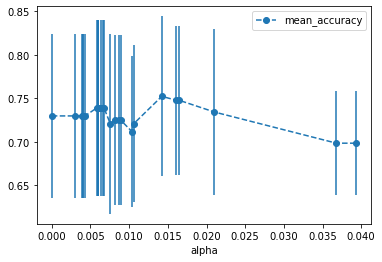

In [56]:
# create an array to store the results of each fold during cross validations
alpha_loop_values=[]

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (The accuracy) for each call to cross_val_score in alpha_loop_values

for ccp_alpha in ccp_alphas:
    model4=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores=cross_val_score(model4,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
## Now we can draw a graph of the means and standard deviations of the scores for each candidate  value for alpha

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

Using cross validation, we can see that, over all, instead of setting ccp_alpha=0.016, we need to set it to something closer to 0.014. We can find the exact value: 

In [57]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.752323,0.091956


Now let's store the ideal value for alpha so that we can use it to build the best tree.

In [60]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

**Note:** At this point python thinks that ideal_ccp_alpha is a series, which is a type of array. we can tell because when we printed ideal_ccp_alpha out, we got two bits of stuff. the first one was 20, which is the index in the series, the second one, 0.014225. is the value we weant. So we can convert this from a series to a float with the following command:

In [61]:
## convert ideal_ccp_alpha from a series to a float

ideal_ccp_alpha= float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

### Now we got the ideal value for alpha and we can build, evaluate and draw the final classification Tree

## Building, Evaluating, Drawing, and Interpreting the Final Classification Tree

Now that we have the ideal value for alpha we can build the final **Classification Tree** by setting ccp_alpha=ideal_ccp_alpha.

In [63]:
## Build and train a new decision tree, only this time use the optimal value for alpha

model5=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
model5=model5.fit(X_train,y_train)

Now lets draw another confusion matrix to see if the pruned tree does better

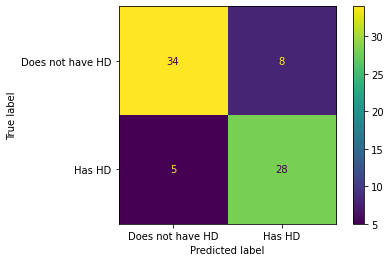

In [64]:
plot_confusion_matrix(model5,X_test,y_test,display_labels=['Does not have HD','Has HD'])

### We see that pruned tree is better classifing patients than the full sized tree.

In the above confusion matrix, we see that the 34+8 =42 people that does not have Heart Disease, 34(80.09%) were correctly classified. And that the 5+28 =33 people that have Heart Disease, where 27(84.84%) were classified correctly. 
Where this is an improvement over the full sized tree

The last thing we are going to draw the pruned tree and discuss how to interpret it.

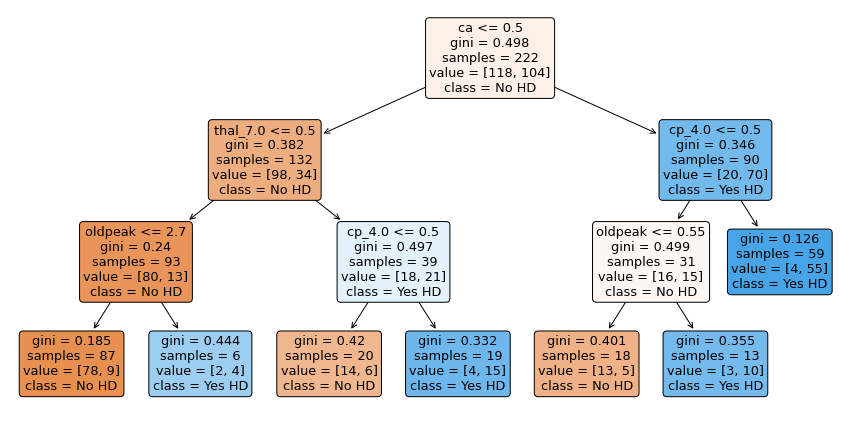

In [70]:
plt.figure(figsize=(15,7.5))
plot_tree(model5,filled=True,rounded=True,class_names=['No HD','Yes HD'],feature_names=X_encoded.columns)
plt.show()

Now let's discuss how to interpret the tree. In each node, we have:

- The variable(column names) and the threshold for splitting the observations. for example, in the tree's root, we use ca to split the observations.All observations with **ca <=0.5** go to the **left** and all observations with **ca >0.5** go to the **right**

- **Gini** is the gini index or score for that node.
- **Samples** tell us how many samples are in the node.
- **value** tells us how many samples in the node are in each category in this example, we have two categories, **No** and **Yes** referring to whether or not a partient has heart disease. The number of patients with **No** comes first because the categorial order. Thus, in the root,118 patients have **NO** and 104 patient have **Yes**.
- **class** tells us whichever category is represented most in the node. in the root, since 118 people have **No** and only 104 people have **Yes**, class is set to **NO**

The leaves are just like the nodes, except that they do not contain a variable and threshold for splitting the observations.

Lastly, the nodes are colored by the class, in this case **No** is different shades of orange'ish and **Yes** is different shades of blue. The darker the shade, the lower the **Gini Score**, and that tells us how much the nodes or leaf is skewed towards one class.